In [14]:
import numpy as np
import scipy as sp
from scipy.fft import fft2,ifft2,fftfreq,fftshift
import imageio

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
from matplotlib import animation
from matplotlib.animation import PillowWriter
import pint

u = pint.UnitRegistry()

In [15]:
2*u.mm

2 <Unit('millimeter')>

In [16]:
D = 0.1*u.mm
lam = 660*u.nm

In [20]:
x = np.linspace(-2,2,2000)*u.mm
xv,yv = np.meshgrid(x,x)

In [22]:
# defining u(x,y,0)
U0 = (np.abs(xv)<D/2)*(np.abs(yv)<0.5*u.mm)
U0 = U0.astype(float)                        #change data type from boolean to float

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


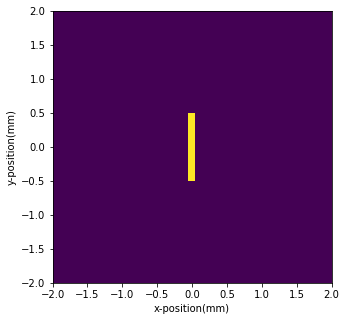

In [43]:
# plotting the slit U0 = u(x,y,0)
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,U0,cmap='viridis')
plt.xlabel('x-position(mm)')
plt.ylabel('y-position(mm)')
plt.show()

In [44]:
# doing fft in two dimensions
A = fft2(U0)
kx = fftfreq(len(x),np.diff(x)[0])*2*np.pi
kxv,kyv = np.meshgrid(kx,kx)


/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


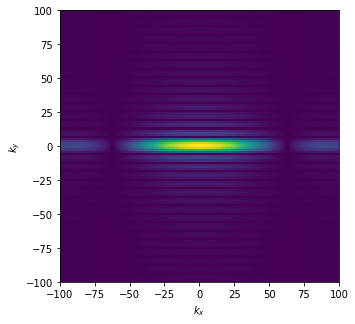

In [45]:
#plotting the fourier transform
plt.figure(figsize=(5,5))
plt.pcolormesh(fftshift(kxv.magnitude),fftshift(kyv.magnitude),np.abs(fftshift(A)))
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.show()

In [46]:
def get_U(z,k):
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


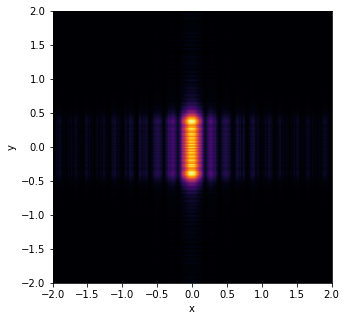

In [47]:
k = 2*np.pi/lam
z1 = 3*u.cm
U = get_U(z1,k)     #get value of U
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(U),cmap='inferno')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [65]:
x = np.linspace(-2,2,2000)*u.mm
xv,yv = np.meshgrid(x,x)

In [75]:
U0 = (np.sqrt(xv**2 + yv**2)<0.25*u.mm) * (np.sqrt(xv**2 + yv**2)>0.2*u.mm)
U0.astype(float)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


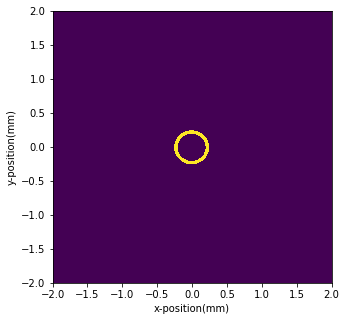

In [76]:
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,U0,cmap='viridis')
plt.xlabel('x-position(mm)')
plt.ylabel('y-position(mm)')
plt.show()

In [77]:
# doing fft in two dimensions
A = fft2(U0)
kx = fftfreq(len(x),np.diff(x)[0])*2*np.pi
kxv,kyv = np.meshgrid(kx,kx)


/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


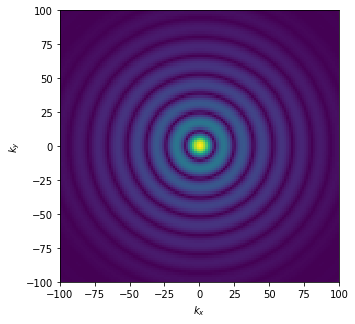

In [78]:
#plotting the fourier transform
plt.figure(figsize=(5,5))
plt.pcolormesh(fftshift(kxv.magnitude),fftshift(kyv.magnitude),np.abs(fftshift(A)))
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.show()

In [79]:
def get_U(z,k):
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


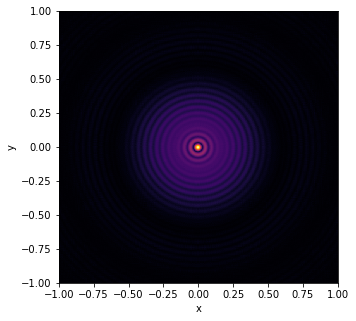

In [81]:
k = 2*np.pi/lam
z1 = 3*u.cm
U = get_U(z1,k)     #get value of U
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(U),cmap='inferno')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

In [65]:
x = np.linspace(-2,2,2000)*u.mm
xv,yv = np.meshgrid(x,x)

In [82]:
U0 = np.sqrt(xv**2 + yv**2)<0.2*u.mm
U0.astype(float)

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


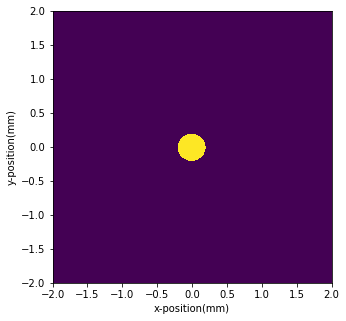

In [83]:
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,U0,cmap='viridis')
plt.xlabel('x-position(mm)')
plt.ylabel('y-position(mm)')
plt.show()

In [84]:
# doing fft in two dimensions
A = fft2(U0)
kx = fftfreq(len(x),np.diff(x)[0])*2*np.pi
kxv,kyv = np.meshgrid(kx,kx)


/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  This is separate from the ipykernel package so we can avoid doing imports until


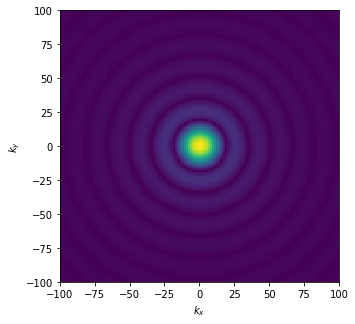

In [85]:
#plotting the fourier transform
plt.figure(figsize=(5,5))
plt.pcolormesh(fftshift(kxv.magnitude),fftshift(kyv.magnitude),np.abs(fftshift(A)))
plt.xlim(-100,100)
plt.ylim(-100,100)
plt.xlabel('$k_x$')
plt.ylabel('$k_y$')
plt.show()

In [86]:
def get_U(z,k):
    return ifft2(A*np.exp(1j*z*np.sqrt(k**2-kxv**2-kyv**2)))

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:5: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  """


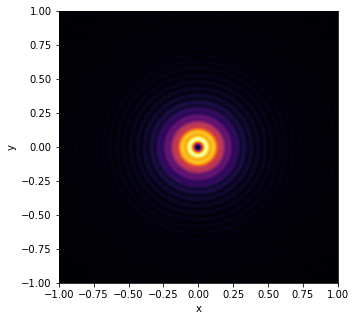

In [87]:
k = 2*np.pi/lam
z1 = 3*u.cm
U = get_U(z1,k)     #get value of U
plt.figure(figsize=(5,5))
plt.pcolormesh(xv,yv,np.abs(U),cmap='inferno')
plt.xlabel('x')
plt.ylabel('y')
plt.xlim(-1,1)
plt.ylim(-1,1)
plt.show()

/home/kanan/.local/lib/python3.6/site-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  


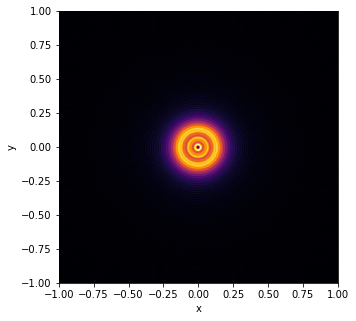

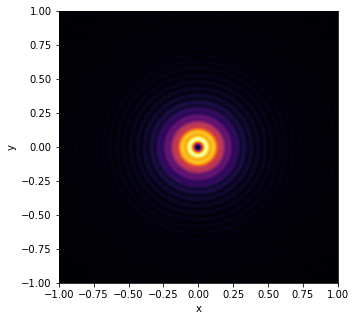

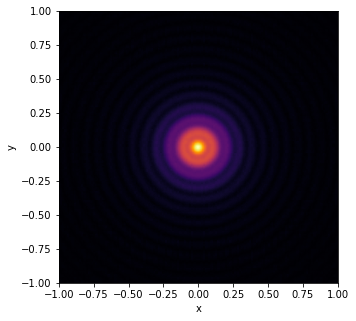

In [90]:
z = np.arange(1,6,2)
for i in z:
    j = i*u.cm
    U = get_U(j,k)     #get value of U
    plt.figure(figsize=(5,5))
    plt.pcolormesh(xv,yv,np.abs(U),cmap='inferno')
    plt.xlabel('x')
    plt.ylabel('y')
    plt.xlim(-1,1)
    plt.ylim(-1,1)
    plt.show()

In [89]:
z

array([0, 1, 2, 3, 4, 5])